<a href="https://colab.research.google.com/github/marinaepitropaki/Data_Visualization/blob/master/CSV_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extraction of the CSV file into np.array

float_data = []
with open('/content/drive/MyDrive/photometry_nobkg_v432per_10.csv', 'r') as f:
  file_to_split = f.read()
  for i, row in enumerate(file_to_split.split('\n')):
    if i ==0 or not row:
      continue
    splitted_row = row.split(',')
    float_row =[float(f) for f in  splitted_row]
    float_data. append(float_row)
    # print(float_row)
  # print(float_data)
array_data = np.array(float_data)

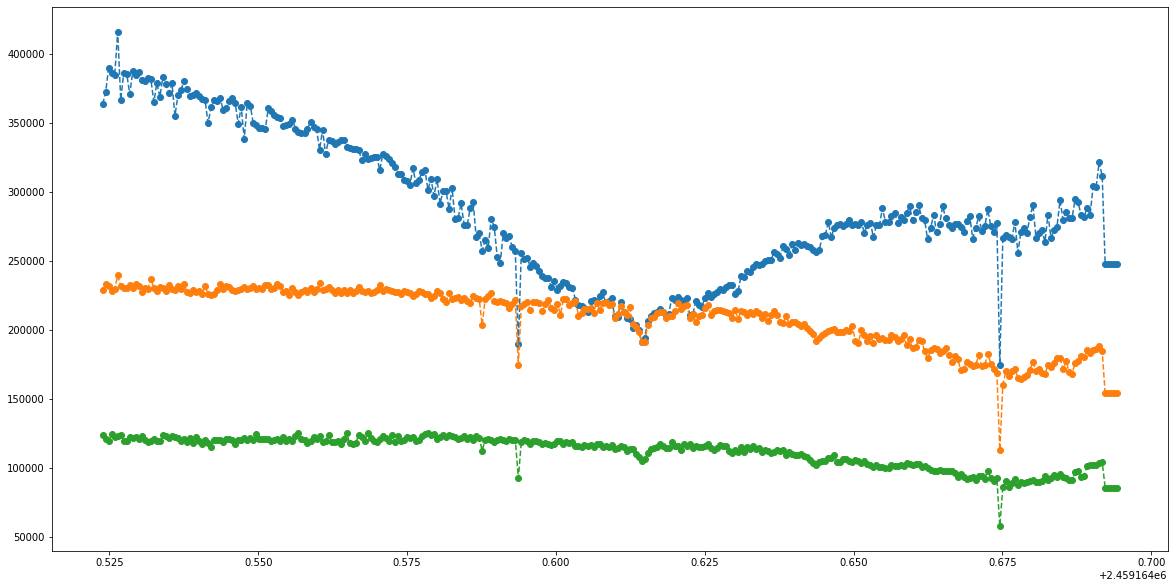

In [ ]:
#Plot of the time-intensity for the 3 objects

fig, ax=plt.subplots(1,1,figsize=(20,10))

ax.plot(array_data[:,0], array_data[:,1] ,marker='o', linestyle='dashed')
ax.plot(array_data[:,0], array_data[:,2] ,marker='o', linestyle='dashed')
ax.plot(array_data[:,0], array_data[:,3] ,marker='o', linestyle='dashed')
plt.show()

In [ ]:
#Convertion of the time unit

time_array = []
#SELECT TIME UNIT {None(julian days), sec, min, hours, day,phase}
time_unit = 'None'

#Normalization of the time array to zero 

time_array = array_data[:, 0] - array_data[0,0]
if time_unit == 'None':
  time_array= time_array
elif time_unit == 'sec':
  time_array= time_array*60*60*24
elif time_unit == 'min':
  time_array= time_array*60*24
elif time_unit == 'hours':
  time_array= time_array*24
elif time_unit == 'day':
  time_array= time_array
elif time_unit == 'phase':

  #INPUT THE PERIOD AND THE T0 OF THE STAR

  star_period = 0.3833079
  t_min =  2459179.18416
  time_array = (((array_data[0,0] +time_array) - t_min)/star_period) % 1
  print( t_min, time_array)
else :
  print('Wrong input')

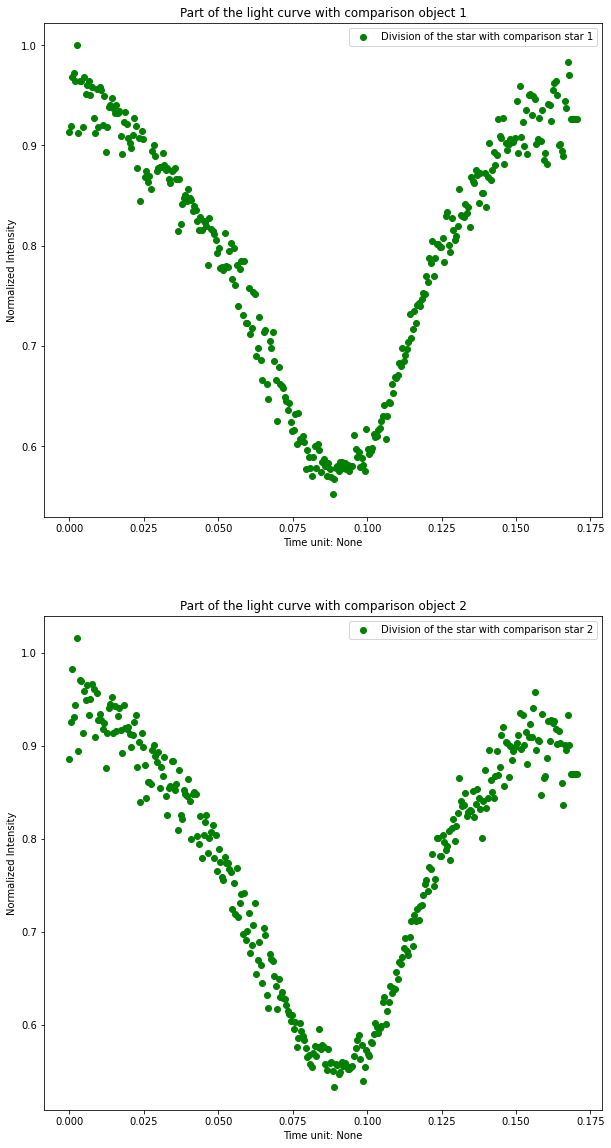

In [ ]:
#Normalization of the objects

norm_array = array_data[:, 1]/ array_data[:, 1].max()
norm_comp_array_1 = array_data[:,2]/array_data[:,2].max()
norm_comp_array_2 = array_data[:,3]/ array_data[:,3].max()

#Division of the normalized main object with the comparison
star_division_1 = norm_array / norm_comp_array_1
star_division_2 =norm_array / norm_comp_array_2

#Plot for comparison
fig, ax=plt.subplots(2,1,figsize=(10,20))

#PLOT OF THE DIVIDED MAIN OBJECT
ax[0].scatter(time_array, 
              star_division_1, 
              marker ='o', 
              color ='green', 
              label='Division of the star with comparison star 1')

#PLOT OF THE MAIN OBJECT
# ax[0].plot(time_array, 
#            norm_array, 
#            marker='o', 
#            color='red',
#            label='Normalized main star')

#PLOT OF THE COMPARISON OBJECT 1
# ax[0].scatter(time_array, 
#               norm_comp_array_1, 
#               marker='o', 
#               color='blue',
#               label='Normalized comparison star')

ax[0].set_xlabel(f'Time unit: {time_unit}')
ax[0].set_ylabel('Normalized Intensity')
ax[0].set_title('Part of the light curve with comparison object 1')

#PLOT OF THE DIVIDED MAIN OBJECT
ax[1].scatter(time_array, 
              star_division_2, 
              marker ='o', 
              color='green', 
              label='Division of the star with comparison star 2')

#PLOT OF THE MAIN OBJECT
# ax[1].plot(time_array, 
#            norm_array, 
#            marker='o', 
#            color='red', 
#            label='Normalized main star')

#PLOT OF THE COMPARISON OBJECT 2
# ax[1].scatter(time_array, 
#               norm_comp_array_2, 
#               marker='o', 
#               color='blue',
#               label='Normalized comparison star')

ax[1].set_xlabel(f'Time unit: {time_unit}')
ax[1].set_ylabel('Normalized Intensity')
ax[1].set_title('Part of the light curve with comparison object 2')


leg = ax[0].legend();
leg = ax[1].legend();
